In [2]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from case2_rk4 import rk_defect_control_perfect_first_step,  rk_defect_control_static_alpha_beta, rk_defect_control_perfect_first_step_smooth

In [3]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [4]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    # (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step(model, t_span, y0[0], tol, solution)
    (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step_smooth(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, derivs) = rk_defect_control_static_alpha_beta(model, t_span, y0[0], tol, solution)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    for this_x in xs:
        plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    plt.plot(t_eval, computed_solutions, label="rk6_interpolated")

    actual_solutions = solution(t_eval)
    plt.plot(t_eval, actual_solutions, label="solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    plt.title("solution vs rk6_interpolated")
    plt.xlabel("t")
    plt.ylabel('y')
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    for this_x in xs:
        plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="global error")
    plt.title("global error")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # ====================================== figure of satisfying global defect
    actual_f_evals = [model(x, solution([x])[0])[0] for x in t_eval]
    hb_prime_evals = [first_deriv(x) for x in t_eval]
    plt.figure()
    plt.plot(t_eval, actual_f_evals)
    plt.plot(t_eval, hb_prime_evals)
    plt.title(f"first derivative for tol={tol}")
    plt.show()

    defects = [abs(actual_f_eval - hb_prime_eval) for (actual_f_eval, hb_prime_eval) in zip(actual_f_evals, hb_prime_evals)]
    plt.figure()
    plt.plot(t_eval, defects)
    plt.title(f"global defect for tol={tol}")
    plt.show()
    
    # ====================================== end figure of satisfying global defect

    # ====================================== figure of defect shape

    minimum_step_size = 0.01
    defects_small_steps = []
    plt.figure()
    for (x_i_minus_1, x_i, x_i_plus_1, hb) in derivs:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        defects = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            f_eval  = model(pt, y)[0]
            hb_prime_eval = hb.prime(pt)
            defects.append( abs(hb_prime_eval - f_eval) )
        maximum_defect = max(defects)
        # minimum_defect = min(defects)
        # plot_vals = [(defect - minimum_defect) / (maximum_defect - minimum_defect) for defect in defects]
        plot_vals = [ defect/ maximum_defect for defect in defects]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (x_i_plus_1 - x_i < minimum_step_size):
            defects_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
    plt.title("plot of defects")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # ====================================== defects on small steps
    plt.figure()
    for [x_axis, plot_vals] in defects_small_steps:
        plt.plot(x_axis, plot_vals)
    plt.title("plot of defects on small step sizes")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    plt.show()
    
    # ========================================================= end of steps error vs interpolant error
    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999996, 1.0000000000000004, 0.4999999999999998, 1.9999999999999991, 0.5000000000000004, 1.0000000000000009, 0.9999999999999981, 0.9999999999999991]
beta values [0.9999999999999996, 1.0, 2.0, 1.9999999999999991, 1.0000000000000004, 2.000000000000001, 0.5000000000000002, 1.9999999999999982, 0.9999999999999991, 2.0000000000000018, 1.0000000000000018, 1.0000000000000009]
n_steps 44
n_successful_steps 33

integration complete


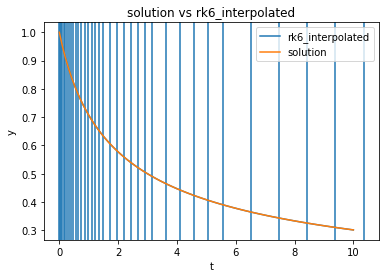

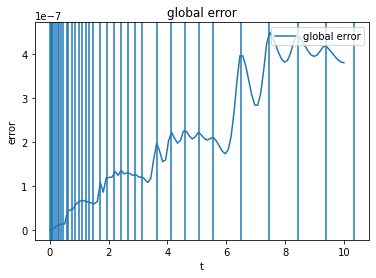

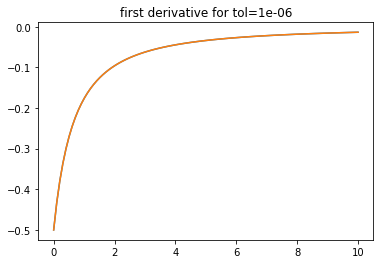

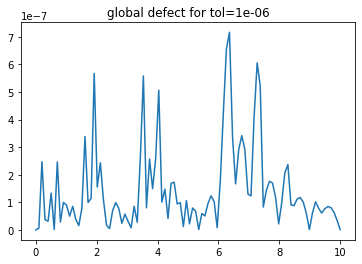

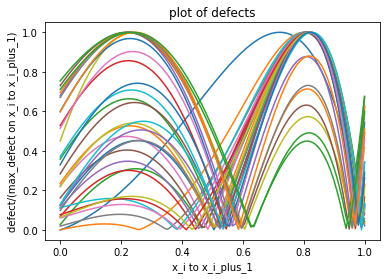

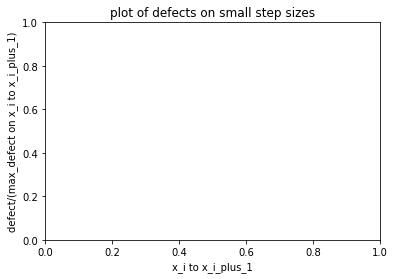

0.0
0.0
0.0
2.052098491134302e-10
5.459915075611832e-09
9.011962398552953e-09
1.138856431381896e-08
1.2944805116710256e-08
1.3923628583434322e-08
1.4493568234463794e-08
4.56712101470913e-08
4.3911311697897304e-08
5.7096392058753054e-08
6.376084649151181e-08
6.655365925034573e-08
6.703270694075059e-08
6.613510039610304e-08
6.44345182765349e-08
6.228661852958339e-08
1.0836567476690817e-07
1.2862091436360856e-07
1.355705618877323e-07
1.3558020139914362e-07
1.320069415999825e-07
1.2666830850882604e-07
1.2056426107465157e-07
1.9787213850763763e-07
2.245165811598504e-07
2.2827480189446803e-07
2.216821942679914e-07
2.106524246703323e-07
4.0265869133415677e-07
4.499888038855815e-07
4.4383050468166374e-07
4.183742468577556e-07
3.8720427919525235e-07


In [5]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999991, 0.9999999999999996, 1.0000000000000004, 2.0]
beta values [0.9999999999999996, 1.0, 2.0, 1.0000000000000004, 1.0000000000000009, 1.9999999999999982, 0.5]
n_steps 130
n_successful_steps 86

integration complete


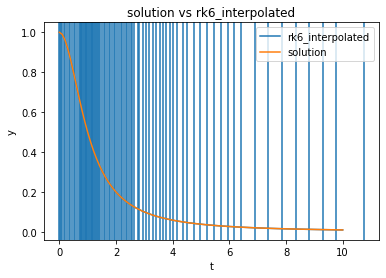

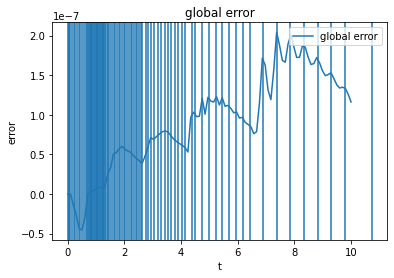

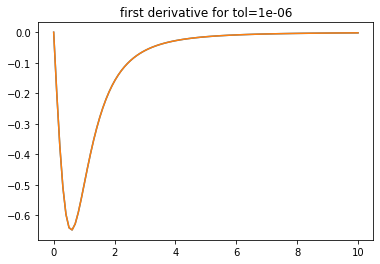

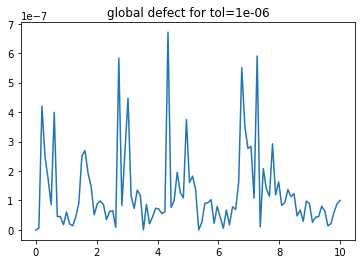

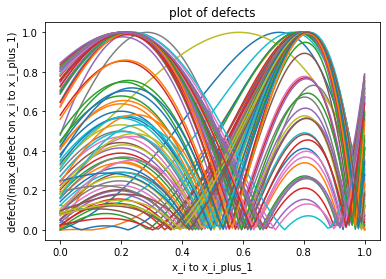

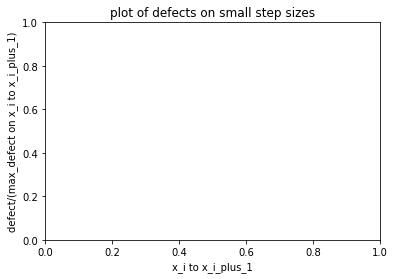

0.0
0.0
0.0
1.242778102650277e-10
6.780740746670233e-09
1.6226844312683397e-08
2.7166353389063147e-08
3.764323674992909e-08
4.540733578028977e-08
4.84365021424793e-08
4.5407378745920823e-08
3.594945219287382e-08
2.0631587993591438e-08
7.381407707285348e-10
2.9465319073551655e-12
7.675493574055281e-10
1.5428875954626164e-09
2.3169506313536203e-09
3.078792887301063e-09
3.818735994087774e-09
4.528488029009736e-09
5.201189701153908e-09
5.831398808275878e-09
6.41502895248891e-09
6.949252728816191e-09
7.432381932126475e-09
7.863734663438038e-09
8.243496441018294e-09
8.572582255172989e-09
8.852504951306628e-09
9.08525138454408e-09
9.273170842316603e-09
9.418874569178115e-09
9.525149224920426e-09
9.594881722474469e-09
9.630996833376315e-09
2.5504818257360284e-08
2.4585495028706106e-08
3.607662191207339e-08
4.472559095303197e-08
5.102705968873522e-08
5.5409281329854565e-08
5.82380703662011e-08
5.982240963708918e-08
6.042077888013253e-08
6.02475949129655e-08
5.947938058747937e-08
5.8260445218172

In [6]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

tolerance= 1e-06
alpha values [0.5, 1.0, 2.0, 0.4999999999999999, 0.5000000000000001, 1.0000000000000009, 0.9999999999999981]
beta values [0.5, 1.0, 2.0, 2.0000000000000004, 1.9999999999999996, 0.9999999999999996, 0.9999999999999991, 2.0000000000000018, 1.0000000000000018, 1.9999999999999982]
n_steps 57
n_successful_steps 35

integration complete


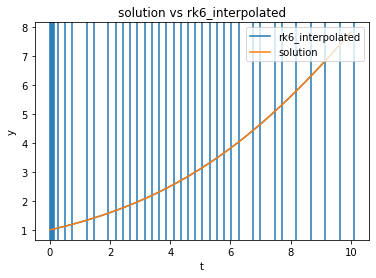

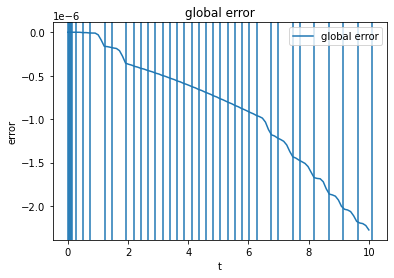

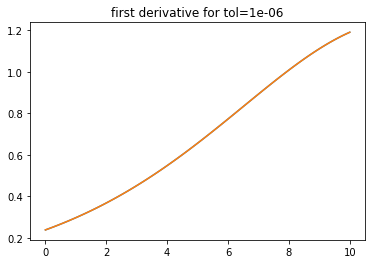

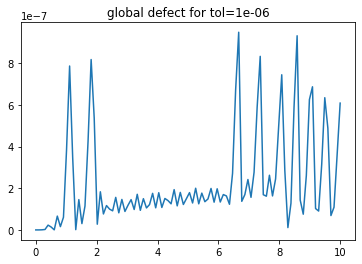

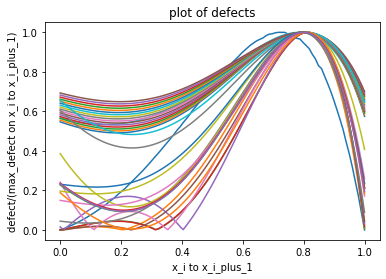

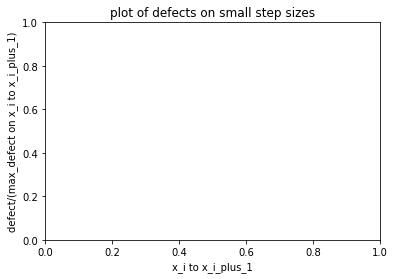

0.0
0.0
0.0
1.3589129821411916e-13
4.496403249731884e-12
1.4522494318214285e-10
4.722512381150068e-09
9.694393288128822e-09
1.656157551099824e-07
1.795389190650809e-07
3.658619804891572e-07
3.9019766062686756e-07
4.1565995601011707e-07
4.4225384088214525e-07
4.699785709494364e-07
4.988271173900216e-07
5.287856081892528e-07
5.598327805778069e-07
5.919394658882027e-07
6.250681061636953e-07
6.591723176185837e-07
6.941965149387386e-07
7.300756048600476e-07
7.667347583506512e-07
8.040892738314653e-07
8.420445447576697e-07
8.804961324493377e-07
9.193299521648157e-07
9.584225892922404e-07
1.1781374871233652e-06
1.2218900558025325e-06
1.4328555026921208e-06
1.4786442914527242e-06
1.6747346975876098e-06
1.8597395694541774e-06
2.031408953051539e-06
2.1878775635642e-06
2.3276284339956987e-06


In [7]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

tolerance= 1e-06
alpha values [0.5, 1.0, 2.0000000000000147, 0.4999999999999963, 0.9999999999999852, 1.0000000000000295, 0.9999999999999408, 2.0, 0.5000000000000296, 1.9999999999998817, 1.000000000000237, 0.9999999999995263, 15.999999999999986, 1.0000000000004736, 0.9999999999997632]
beta values [0.5, 1.0, 0.06250000000000006, 0.2500000000000002, 0.1250000000000001, 2.0, 0.4999999999999963, 2.0000000000000147, 1.0000000000000149, 1.9999999999999705, 2.000000000000059, 0.9999999999999704, 0.9999999999995263, 1.0000000000000593, 1.9999999999998817, 1.000000000000237, 1.0000000000004736, 0.9999999999997632, 0.5000000000000296]
n_steps 6512
n_successful_steps 5065

integration complete


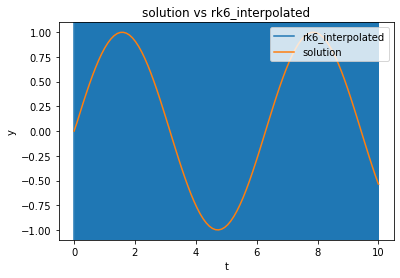

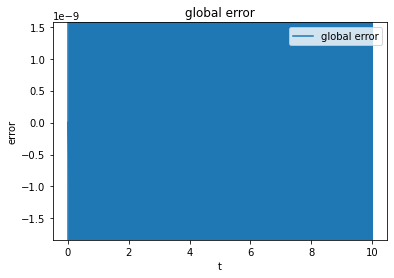

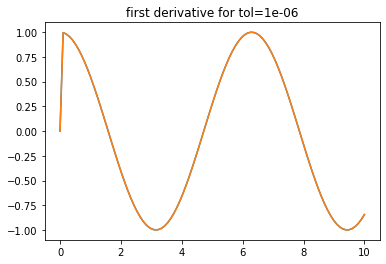

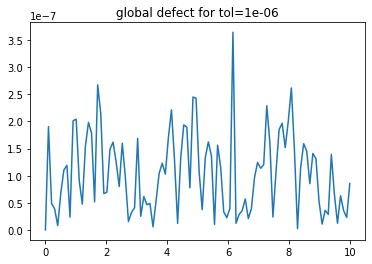

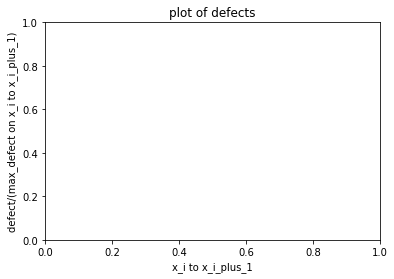

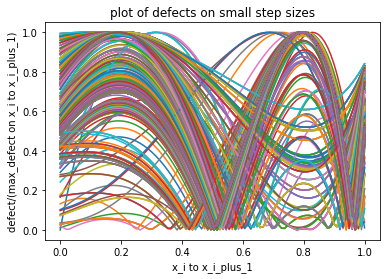

0.0
0.0
0.0
3.346489751976378e-11
5.282200371548029e-11
5.810681796836192e-10
6.055736051502336e-10
3.8067748953096725e-10
5.0917783878112743e-11
3.0516977833627834e-10
6.479075609355789e-10
9.598538908139886e-10
1.235776744823447e-09
1.4767233130763557e-09
1.6866046892438646e-09
1.8703023574317967e-09
2.032678816932254e-09
2.178112093464968e-09
2.3103231550081205e-09
2.4323586755858884e-09
2.5466487391101467e-09
2.1394441218625104e-09
2.3900043472080412e-09
2.0109630904929787e-09
2.3456926540044165e-09
1.975593771907924e-09
2.3649739666620206e-09
1.992935677597174e-09
2.420239647582534e-09
2.0401040301543105e-09
2.4958509425854203e-09
2.1041356434992053e-09
1.779840080873285e-09
1.5114373086433375e-09
1.2893711376360528e-09
1.1057192661478865e-09
9.539137812986098e-10
8.285097607974024e-10
7.249931766040163e-10
6.39621772213772e-10
5.692931126510814e-10
5.114351997459465e-10
4.639157946684236e-10
4.249670615408263e-10
3.931236725041032e-10
3.671705439689532e-10
3.461005371185877e-10
3

In [8]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

tolerance= 1e-06
alpha values [0.5, 1.0, 2.0, 3.9999999999999964, 2.0000000000000147, 0.4999999999999963, 0.9999999999999852, 0.5000000000000074, 2.000000000000059, 0.4999999999999852, 1.9999999999999705, 1.0000000000000295, 1.9999999999998817, 0.9999999999999408, 0.5000000000000296]
beta values [0.5, 1.0, 2.0, 1.9999999999999982, 0.2500000000000002, 0.4999999999999963, 2.0000000000000147, 1.0000000000000149, 1.9999999999999705, 0.4999999999999852, 2.000000000000059, 0.9999999999999704, 0.5000000000000296, 1.9999999999998817, 1.0000000000000593, 0.5000000000000074]
n_steps 2057
n_successful_steps 1571

integration complete


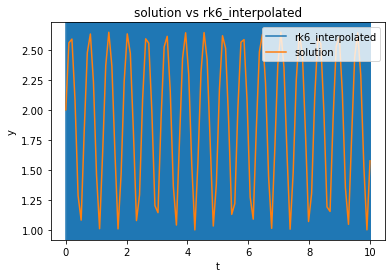

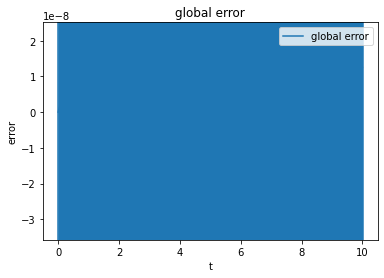

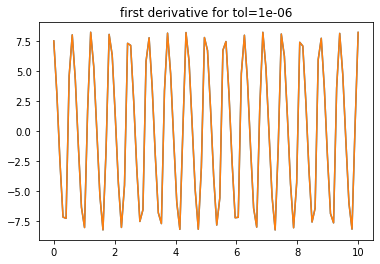

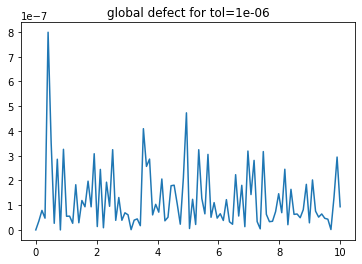

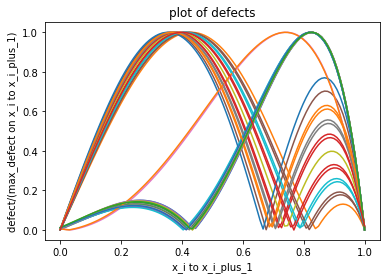

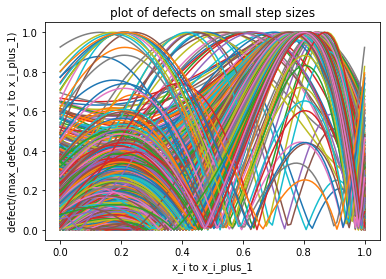

0.0
0.0
0.0
7.995235584701277e-10
1.540942928812683e-09
2.222403594487332e-09
2.8423499109919703e-09
3.3994846937446255e-09
3.89273369094667e-09
4.321217605962602e-09
4.684227228324289e-09
4.981203449716531e-09
5.211720832676292e-09
5.375475620184034e-09
7.585342132188089e-09
5.117442469781963e-09
4.9458597217721945e-09
4.707638279199955e-09
4.403225783988773e-09
4.033197331665406e-09
3.598267017679291e-09
3.099310585952253e-09
2.537385856982155e-09
1.9137611495523288e-09
1.2299494756007334e-09
4.877467318920026e-10
3.107194501694721e-10
1.1629412988156673e-09
2.065969617603969e-09
3.016355609730681e-09
4.010090925987697e-09
5.042559703127836e-09
6.108519912118027e-09
7.202130447581112e-09
8.317075472774604e-09
9.446851079175644e-09
1.0585310628030697e-08
1.172763575141289e-08
1.287196971233584e-08
1.402204929945583e-08
1.5191325752894613e-08
1.6409169800724044e-08
1.7729849366432404e-08
1.9244810189888995e-08
2.1098077507275548e-08
2.3502803925268267e-08
2.675324362044762e-08
2.742110

In [9]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.4999999999999999, 1.0000000000000002, 1.0000000000000004, 0.9999999999999996, 0.5000000000000002]
beta values [0.9999999999999998, 1.0, 2.0, 2.0000000000000004, 1.9999999999999996, 0.9999999999999996, 1.0000000000000004, 1.9999999999999991]
n_steps 26
n_successful_steps 21

integration complete


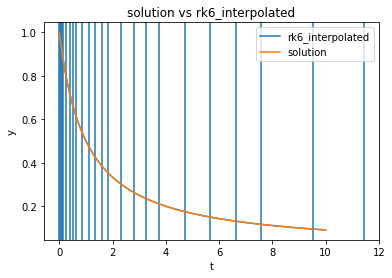

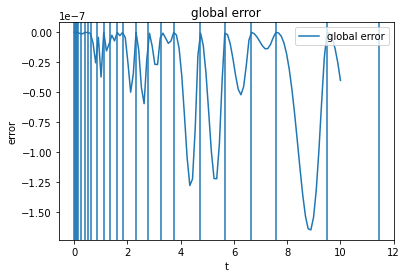

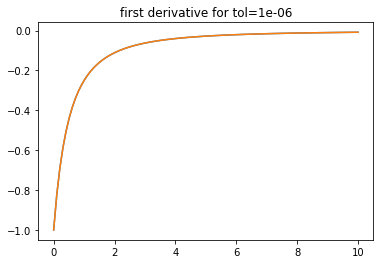

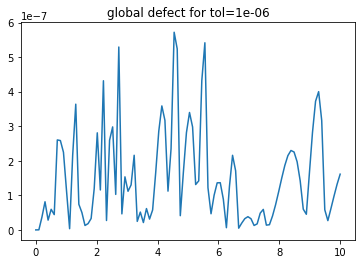

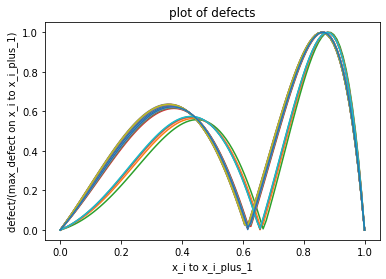

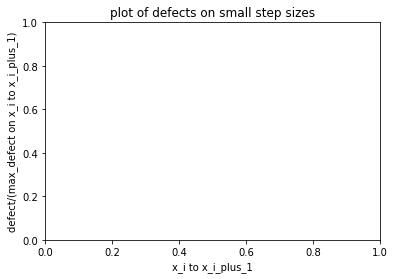

0.0
0.0
0.0
0.0
1.1102230246251565e-16
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
0.0
5.551115123125783e-17
1.1102230246251565e-16
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
0.0
0.0
2.7755575615628914e-17
0.0
0.0
0.0
2.7755575615628914e-17
0.0
0.0


In [10]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.4999999999999999, 1.0000000000000002, 1.0000000000000009, 0.9999999999999981, 0.5000000000000009, 2.0, 1.0000000000000073, 0.4999999999999963]
beta values [0.9999999999999998, 1.0, 2.0, 2.0000000000000004, 1.9999999999999996, 1.9999999999999991, 0.9999999999999991, 2.0000000000000018, 1.0000000000000018, 1.9999999999999982, 1.9999999999999962, 0.5, 0.9999999999999926, 2.0000000000000147, 1.9999999999999927]
n_steps 130
n_successful_steps 72

integration complete


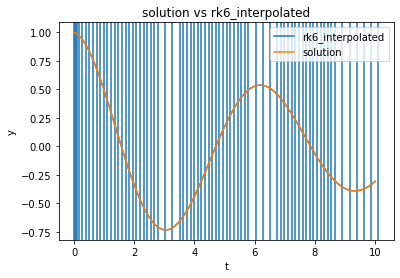

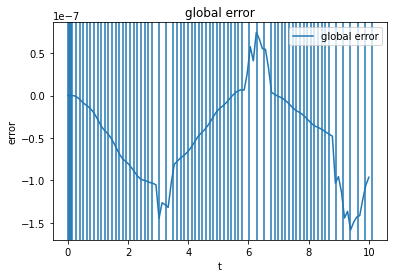

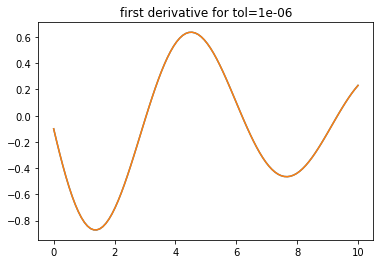

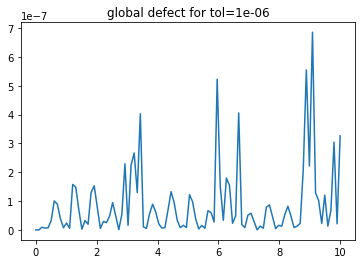

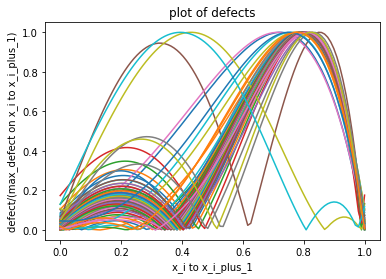

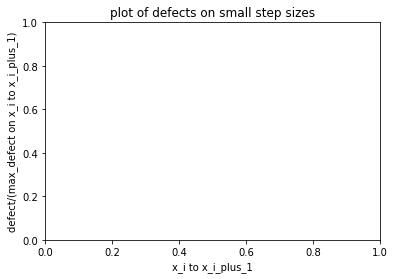

0.0
0.0
0.0
7.893685705084863e-13
3.7754244175403073e-11
1.948597949663622e-09
4.764993621897418e-09
8.413366336945671e-09
1.2810082661296462e-08
1.786288938987468e-08
2.3472439547589374e-08
2.9533885448351782e-08
3.593851216621147e-08
4.257538782637127e-08
4.933300787324235e-08
5.6100906725697897e-08
6.277121732123359e-08
6.924015640008552e-08
7.5409415684069e-08
8.118744193597038e-08
8.649058880205729e-08
9.124412908567692e-08
9.538311407375488e-08
9.885307283852285e-08
1.0161054364576927e-07
1.0362343572101196e-07
1.0487121893110185e-07
1.4500363876290834e-07
1.3582124624988978e-07
8.108477866919372e-08
7.752128783344858e-08
7.341168994923208e-08
6.882217207238028e-08
6.382430867146738e-08
5.849390599665938e-08
5.290981236472092e-08
4.715271409438948e-08
4.1303932413194744e-08
3.5444240764626045e-08
2.965271755786883e-08
2.4005650495206865e-08
1.8575507021445503e-08
1.3429984041524179e-08
8.631148684656864e-09
4.234680051062867e-09
2.892209249871769e-10
3.1641541609062074e-09
6.0923

In [11]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

tolerance= 1e-06
alpha values [0.9999999999999991, 1.0, 2.0, 0.5, 1.0000000000000038, 0.9999999999999963, 0.5000000000000009, 0.9999999999999981]
beta values [0.5, 1.0, 2.0, 0.9999999999999963, 1.0000000000000009, 1.0000000000000038, 1.9999999999999962, 1.0000000000000018]
n_steps 129
n_successful_steps 93

integration complete


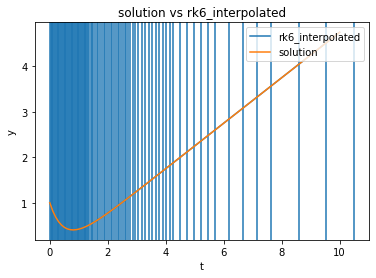

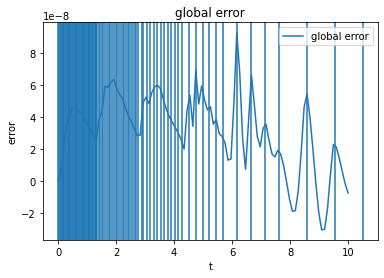

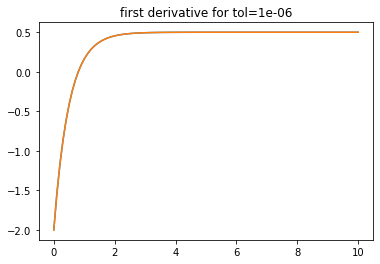

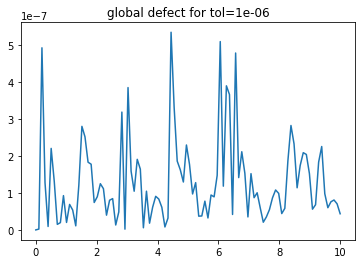

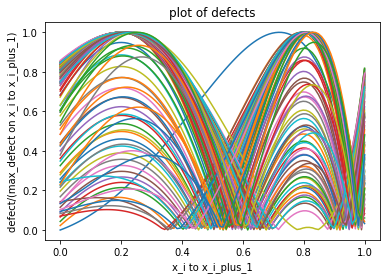

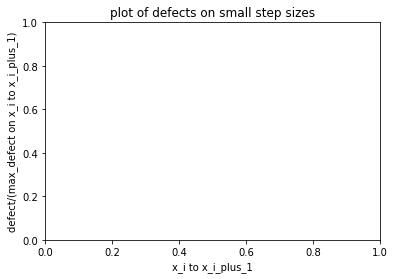

0.0
0.0
0.0
7.112826105881709e-09
1.3397214893018372e-08
1.8925532918601107e-08
2.3764527679048797e-08
2.7975736616170366e-08
3.161586792366222e-08
3.473715370905239e-08
3.738767939687193e-08
3.9611689484075896e-08
4.144987153509305e-08
4.293962108103955e-08
4.4115286257362385e-08
4.500839645427135e-08
4.56478740362698e-08
4.606023101816348e-08
4.626975158572577e-08
4.629866184879816e-08
4.616728710438167e-08
4.589419788647575e-08
4.549634524675383e-08
4.498918676487662e-08
4.4386802511287016e-08
4.3702003627021924e-08
4.294643185520641e-08
4.213065263325433e-08
4.126424069106349e-08
4.035585998707347e-08
3.941333692747406e-08
3.844372881145475e-08
3.745338666982789e-08
3.6448013718271e-08
3.5432719258654544e-08
3.441206836152233e-08
3.339012821790277e-08
3.237051038329497e-08
3.13564100795638e-08
3.035064266576626e-08
2.9355676722797597e-08
2.837366519514717e-08
2.740647347954095e-08
2.6455705903760673e-08
2.5522729651950016e-08
2.4608696969075083e-08
3.8903120946898184e-08
3.71156009

In [12]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [13]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



TypeError: 'int' object is not subscriptable

In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)